In [70]:
import pandas as pd
import plotly
import openpyxl
import cs_demand_model

from cs_demand_model.prediction import ModelPredictor, calculate_rate_from_numbers

In [71]:
pd.set_option('display.max_rows', None)
pd.options.plotting.backend = "plotly"


# Fixed Entrants

We look at a fixed adjustment from NOT IN CARE to a placement type - this would be the equivalent of new entrants.

We're going to assume a starting point of 100 and expect 50 new individuals over the first year.

In [72]:
stock = pd.Series([100], index=[('FIVE_TO_TEN', 'FOSTERING')])
stock

(FIVE_TO_TEN, FOSTERING)    100
dtype: int64

In [73]:
annual_entrant_number = 50

daily_entrants = pd.DataFrame(
    [
        [tuple(), ('FIVE_TO_TEN', 'FOSTERING'), annual_entrant_number/365]
    ], 
    columns=['from', 'to', 'transition_rate']
)
daily_entrants.set_index(['from', 'to'], inplace=True)
daily_entrants = daily_entrants.transition_rate 
daily_entrants

from  to                      
()    (FIVE_TO_TEN, FOSTERING)    0.136986
Name: transition_rate, dtype: float64

We forecast daily for a year forward, and we would expect the number to increase from 100 to 150.

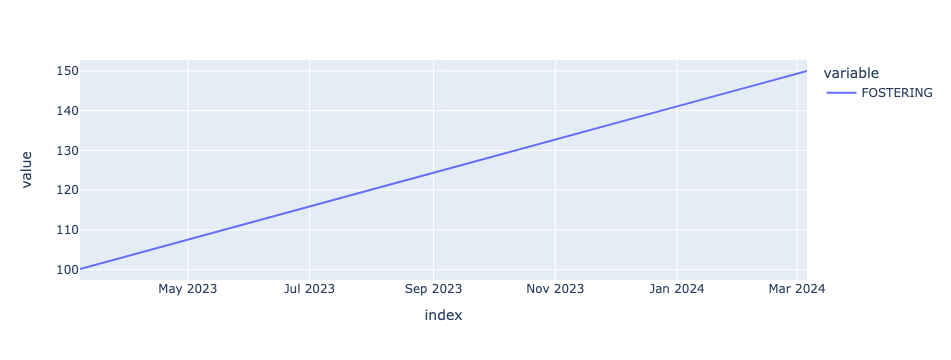

In [74]:
predictor = ModelPredictor(population=stock, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=365, step_days=1)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

And the same should approximately happen if we step forward monthly

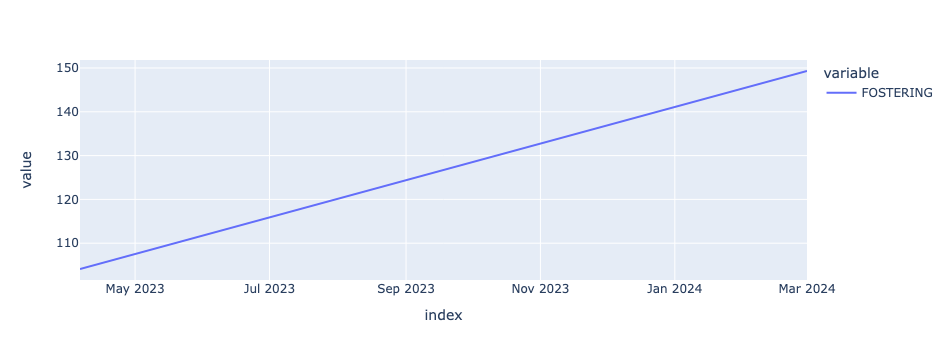

In [75]:
predictor = ModelPredictor(population=stock, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=12, step_days=30)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

# Fixed leavers

We can do the same, having a fixed number leaving care every year. We're going to adjust the numbers so that we 'drain' the population. The population should not be able to drop below zero.

In [76]:
annual_leaver_number = 150

daily_entrants = pd.DataFrame(
    [
        [('FIVE_TO_TEN', 'FOSTERING'), tuple(), annual_leaver_number/365]
    ], 
    columns=['from', 'to', 'transition_rate']
)
daily_entrants.set_index(['from', 'to'], inplace=True)
daily_entrants = daily_entrants.transition_rate 
daily_entrants

from                      to
(FIVE_TO_TEN, FOSTERING)  ()    0.410959
Name: transition_rate, dtype: float64

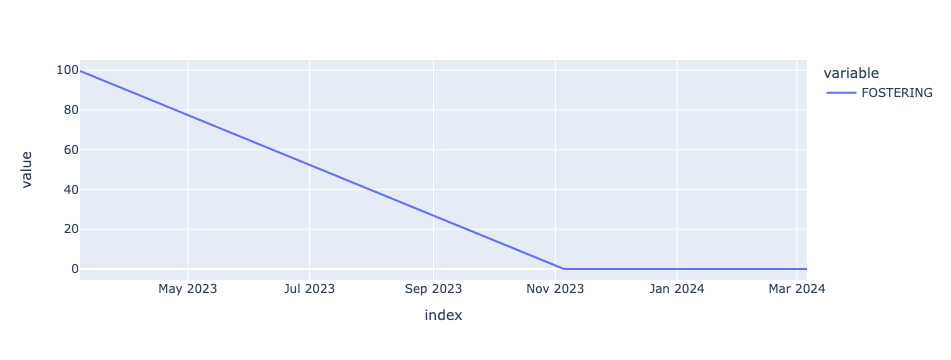

In [77]:
predictor = ModelPredictor(population=stock, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=365, step_days=1)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

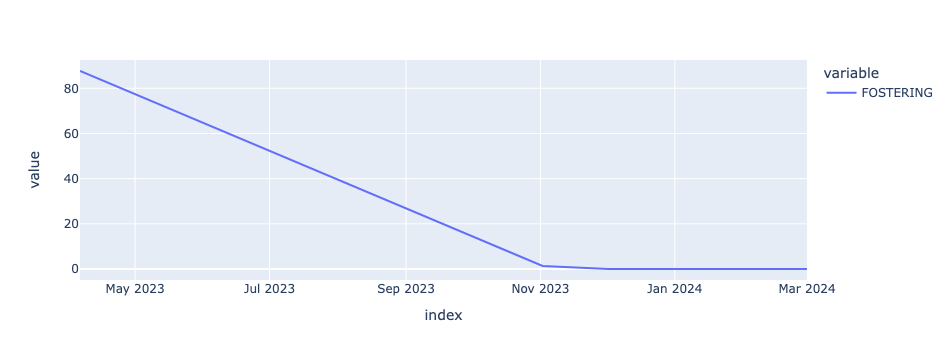

In [78]:
predictor = ModelPredictor(population=stock, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=12, step_days=30)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

# Let's look at the same when transitioning between groups

We're interested in what happens when we transition between groups. Again we should not be able to 'conjure' up individuals by exhausting one group. We create a set with 50 in FOSTERING and 100 in RESIDENTIAL.

We then set a fixed adjustment of 25 from FOSTERING to RESIDENTIAL.

In [79]:
stock = pd.Series([50, 100], index=[('ALL', 'FOSTERING'), ('ALL', 'RESIDENTIAL')])
stock

(ALL, FOSTERING)       50
(ALL, RESIDENTIAL)    100
dtype: int64

In [80]:
correction = 25

daily_entrants = pd.DataFrame(
    [
        [('ALL', 'FOSTERING'), ('ALL', 'RESIDENTIAL'), correction/365]
    ], 
    columns=['from', 'to', 'transition_rate']
)
daily_entrants.set_index(['from', 'to'], inplace=True)
daily_entrants = daily_entrants.transition_rate 
daily_entrants

from              to                
(ALL, FOSTERING)  (ALL, RESIDENTIAL)    0.068493
Name: transition_rate, dtype: float64

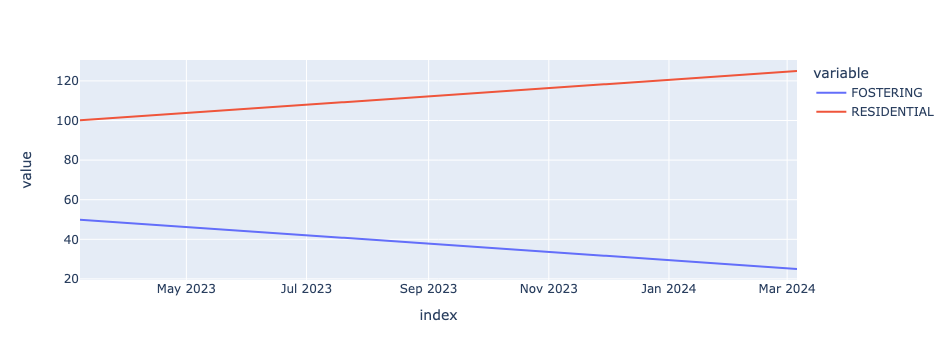

In [81]:
predictor = ModelPredictor(population=stock, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=365, step_days=1)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

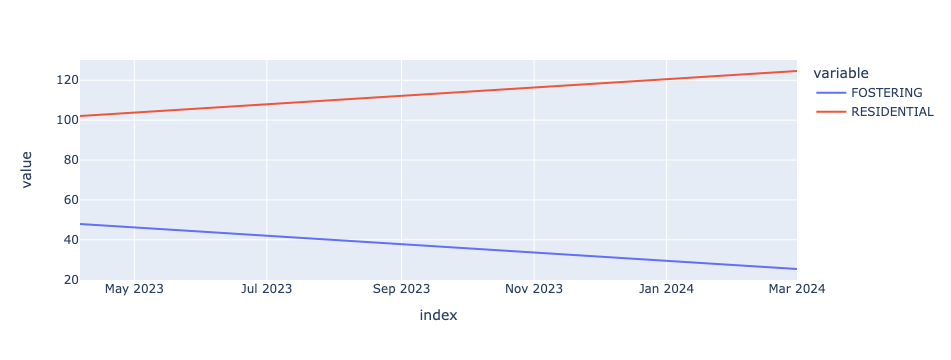

In [82]:
predictor = ModelPredictor(population=stock, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=12, step_days=30)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

But, what happens if we increase the rate so we're expected to drain FOSTERING?

In [83]:
correction = 75

daily_entrants = pd.DataFrame(
    [
        [('ALL', 'FOSTERING'), ('ALL', 'RESIDENTIAL'), correction/365]
    ], 
    columns=['from', 'to', 'transition_rate']
)
daily_entrants.set_index(['from', 'to'], inplace=True)
daily_entrants = daily_entrants.transition_rate 
daily_entrants

from              to                
(ALL, FOSTERING)  (ALL, RESIDENTIAL)    0.205479
Name: transition_rate, dtype: float64

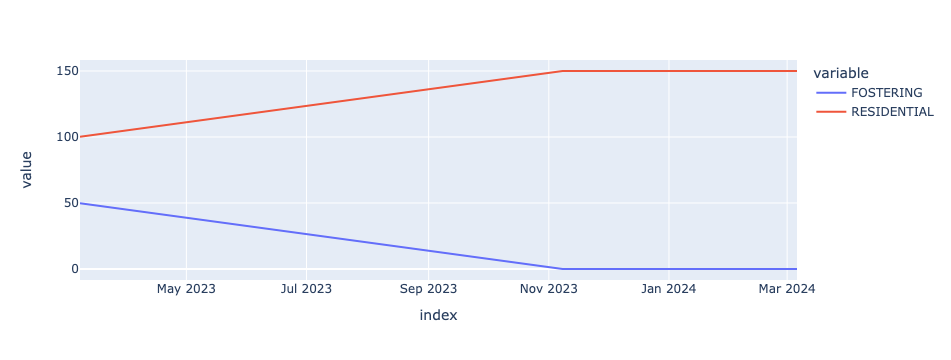

In [84]:
predictor = ModelPredictor(population=stock, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=365, step_days=1)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

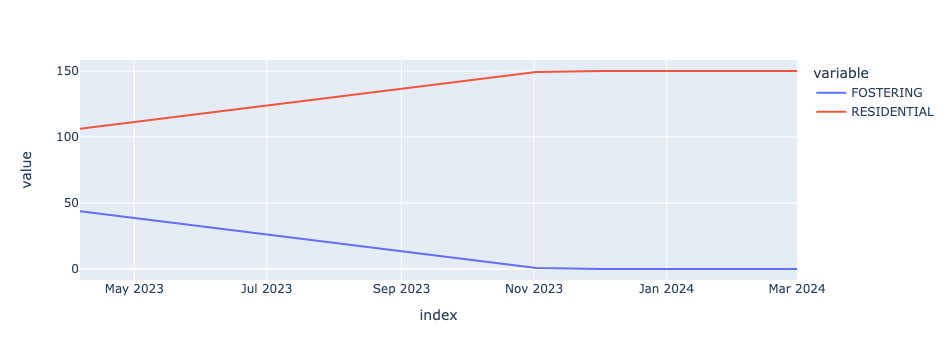

In [85]:
predictor = ModelPredictor(population=stock, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=12, step_days=30)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

This works correctly, so the capping works for individual series, but not for new entrants.